### Análise Exploratória e Pré-Processamento de Dados - MVP

### 1. Definição do Problema

Este projeto tem como objetivo realizar a análise exploratória e o pré-processamento de um conjunto de dados do domínio automotivo, buscando extrair insights relevantes para posterior aplicação em modelos de machine learning supervisionado.

O dataset escolhido é o **Car Evaluation Data Set**, disponível publicamente no [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Car+Evaluation).

### Descrição do problema

A base consiste em avaliações de veículos com base em atributos como preço, manutenção, capacidade de passageiros, tamanho do porta-malas e nível de segurança. O objetivo final dos dados é **classificar o carro em uma das seguintes categorias**: `unacc`, `acc`, `good`, ou `vgood`.

Este é um problema de **classificação supervisionada**, pois a variável-alvo (`class`) é conhecida.

### Atributos do dataset

| Coluna     | Descrição                    |
|------------|------------------------------|
| `buying`   | Preço de compra              |
| `maint`    | Custo de manutenção          |
| `doors`    | Número de portas             |
| `persons`  | Capacidade de passageiros    |
| `lug_boot` | Tamanho do porta-malas       |
| `safety`   | Nível de segurança           |
| `class`    | Avaliação do carro (target)  |


### 2. Organização e publicação do dataset

Para permitir que o notebook fosse totalmente funcional no Google Colab, o dataset foi hospedado em um repositório público do GitHub, conforme exigido pelas boas práticas de entrega.

### Etapas realizadas:

1. O dataset original foi obtido a partir da UCI:  
   [https://archive.ics.uci.edu/ml/machine-learning-databases/car/car.data](https://archive.ics.uci.edu/ml/machine-learning-databases/car/car.data)

2. O conteúdo foi salvo localmente no Mac em formato `.txt`, com o nome: `car.data.txt`.

3. O arquivo foi então **subido para o GitHub**, no seguinte repositório público:  
   👉 [https://github.com/Crlhju/MVP-Analise-de-Dados-PUC-RIO](https://github.com/Crlhju/MVP-Analise-de-Dados-PUC-RIO)

4. Em seguida, foi utilizado o **link raw** do arquivo para permitir a leitura direta no Google Colab:

> Link raw para leitura no notebook:  
> `https://raw.githubusercontent.com/Crlhju/MVP-Analise-de-Dados-PUC-RIO/refs/heads/main/car.data.txt`


### 3. Carregamento do dataset

O código abaixo importa os dados diretamente do repositório GitHub utilizando a biblioteca `pandas`. A leitura inclui também a definição dos nomes das colunas, pois o arquivo original não possui cabeçalho.


In [24]:
import pandas as pd

# Link para o dataset hospedado no GitHub (raw)
url = "https://raw.githubusercontent.com/Crlhju/MVP-Analise-de-Dados-PUC-RIO/refs/heads/main/car.data.txt"

# Nomeando as colunas conforme documentação da UCI
columns = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']

# Leitura do dataset
df = pd.read_csv(url, names=columns)

# Exibindo as 5 primeiras linhas
df.head()


,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


### 4. Validação dos dados e preparação para manipulação

Antes de aplicar qualquer transformação nos dados, é importante verificar se há problemas como:
- Valores nulos (ausentes)
- Valores inválidos (como strings '0', se não fizerem sentido)
- Duplicações
- Tipos incorretos

Além disso, para manter a integridade do dataset original, é boa prática criar uma **cópia de trabalho**, que será manipulada ao longo da análise.


In [25]:
# Criando uma cópia de trabalho do dataset original
df_copy = df.copy()


In [26]:
# Verificando valores nulos por coluna
df_copy.isnull().sum()


,0
buying,0
maint,0
doors,0
persons,0
lug_boot,0
safety,0
class,0


In [27]:
# Verificando presença da string '0' em qualquer coluna
(df_copy == '0').sum()


,0
buying,0
maint,0
doors,0
persons,0
lug_boot,0
safety,0
class,0


In [28]:
# Visualizando os valores únicos por coluna
for col in df_copy.columns:
    print(f"{col}: {df_copy[col].unique()}")


buying: ['vhigh' 'high' 'med' 'low']
maint: ['vhigh' 'high' 'med' 'low']
doors: ['2' '3' '4' '5more']
persons: ['2' '4' 'more']
lug_boot: ['small' 'med' 'big']
safety: ['low' 'med' 'high']
class: ['unacc' 'acc' 'vgood' 'good']


### 5. Normalização dos valores categóricos

Agora vamos substituir os valores categóricos por nomes mais descritivos e legíveis, facilitando a visualização e interpretação dos dados nas análises seguintes.


In [29]:
# Etapa 5: Normalização dos dados categóricos

mapeamentos = {
    'buying': {'vhigh': 'Muito alto', 'high': 'Alto', 'med': 'Médio', 'low': 'Baixo'},
    'maint': {'vhigh': 'Muito alto', 'high': 'Alto', 'med': 'Médio', 'low': 'Baixo'},
    'doors': {'2': '2', '3': '3', '4': '4', '5more': '5+'},
    'persons': {'2': '2', '4': '4', 'more': '5+'},
    'lug_boot': {'small': 'Pequeno', 'med': 'Médio', 'big': 'Grande'},
    'safety': {'low': 'Baixa', 'med': 'Média', 'high': 'Alta'},
    'class': {'unacc': 'Ruim', 'acc': 'Aceitável', 'good': 'Bom', 'vgood': 'Ótimo'}
}

df_copy.replace(mapeamentos, inplace=True)

# Visualizando os valores únicos após a normalização
for col in df_copy.columns:
    print(f"{col}: {df_copy[col].unique()}")


buying: ['Muito alto' 'Alto' 'Médio' 'Baixo']
maint: ['Muito alto' 'Alto' 'Médio' 'Baixo']
doors: ['2' '3' '4' '5+']
persons: ['2' '4' '5+']
lug_boot: ['Pequeno' 'Médio' 'Grande']
safety: ['Baixa' 'Média' 'Alta']
class: ['Ruim' 'Aceitável' 'Ótimo' 'Bom']


### 6. Visualizações dos Dados

Nesta etapa, utilizamos visualizações gráficas para entender a distribuição e as relações entre os atributos do dataset. As visualizações ajudam a identificar padrões, possíveis outliers e características importantes que podem influenciar na modelagem futura.

### Bibliotecas utilizadas:

- **Matplotlib**: biblioteca base para criação de gráficos em Python.
- **Seaborn**: baseada no Matplotlib, oferece gráficos estatísticos com visual mais agradável e suporte direto a DataFrames do Pandas.

Vamos visualizar:

- A distribuição de frequência dos atributos categóricos.
- A distribuição das classes (variável alvo).
- Relações entre atributos e a variável alvo.

Os gráficos são criados diretamente no notebook, utilizando as bibliotecas mencionadas acima.


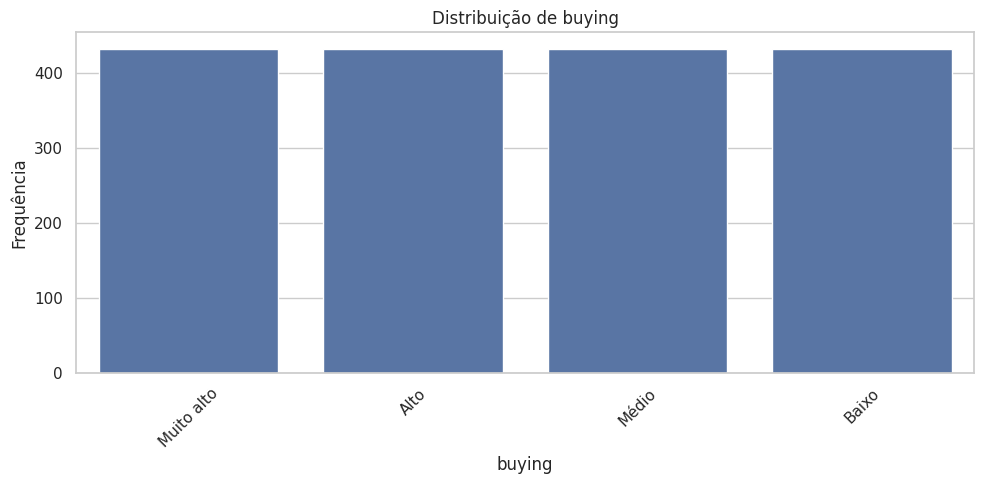

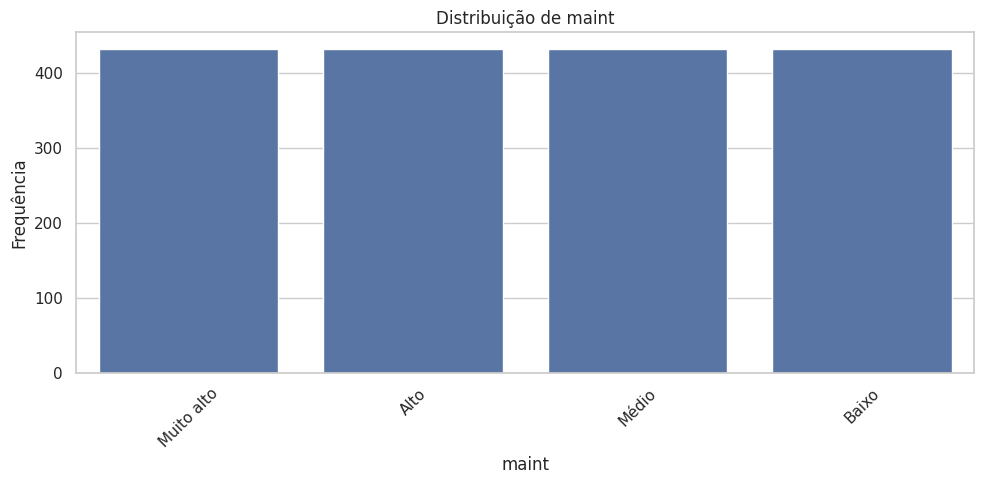

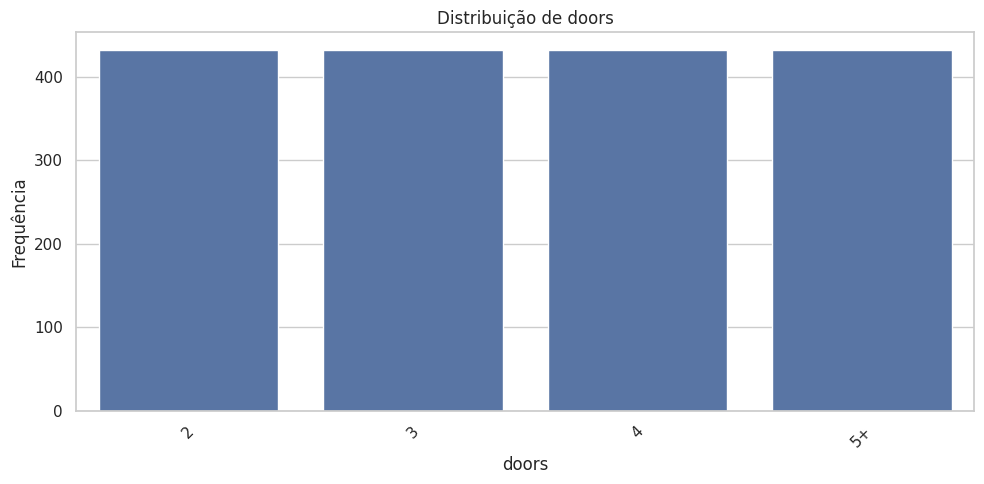

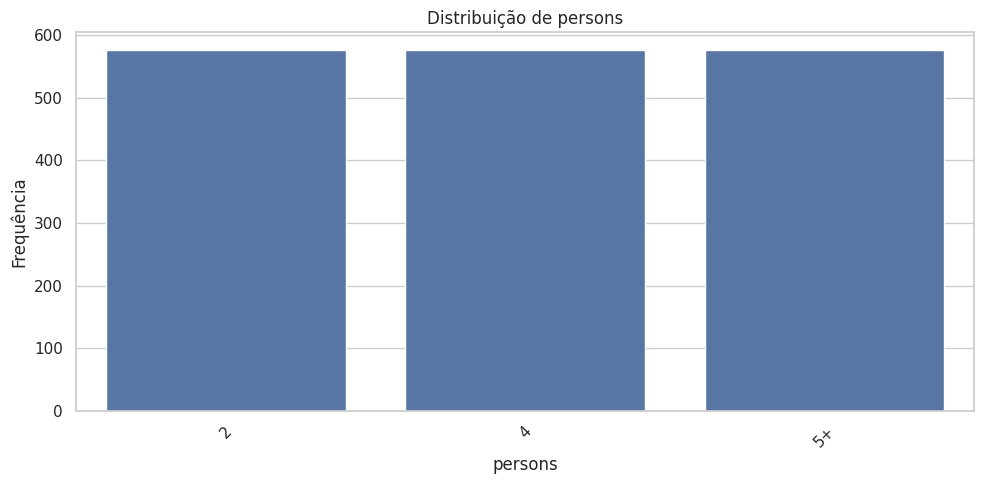

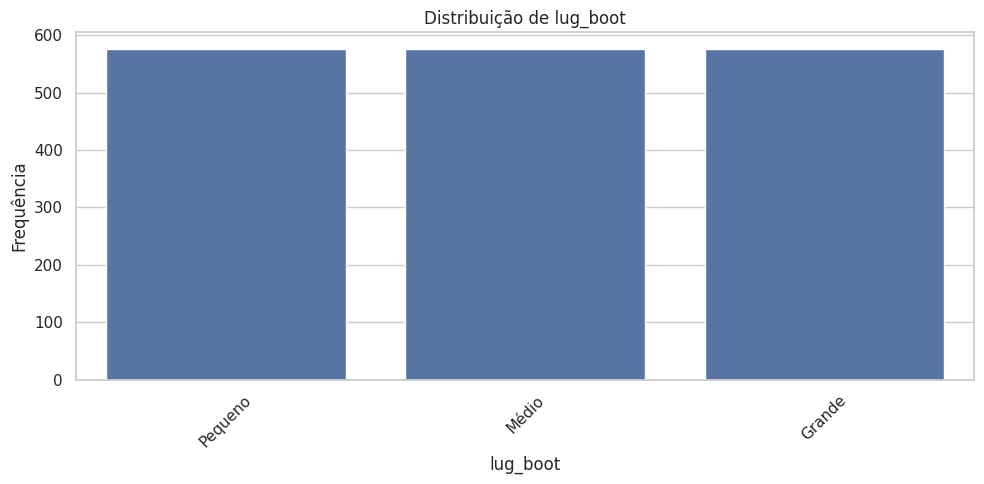

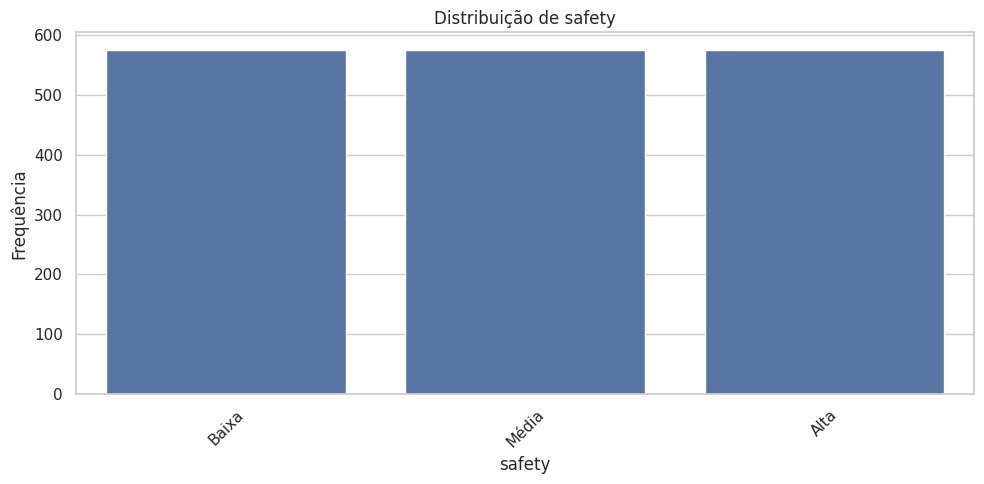

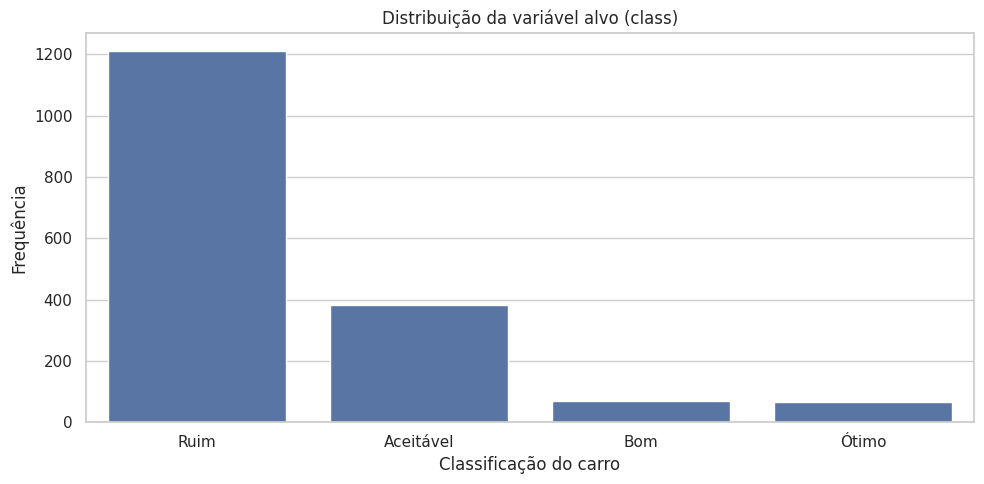

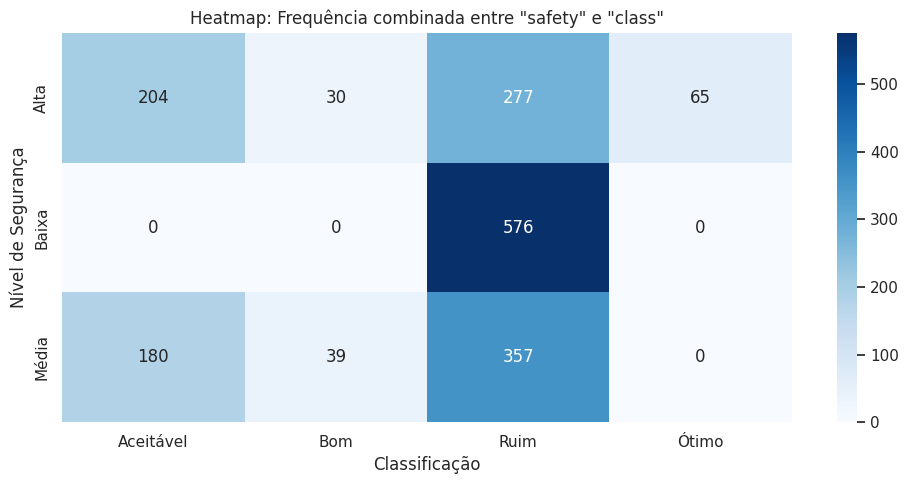

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

# Definindo estilo dos gráficos
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 5)

# Visualizando a distribuição dos atributos categóricos
categorical_cols = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety']

for col in categorical_cols:
    sns.countplot(data=df_copy, x=col, order=df_copy[col].value_counts().index)
    plt.title(f'Distribuição de {col}')
    plt.xlabel(col)
    plt.ylabel('Frequência')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Visualizando a distribuição da variável alvo (class)
sns.countplot(data=df_copy, x='class', order=df_copy['class'].value_counts().index)
plt.title('Distribuição da variável alvo (class)')
plt.xlabel('Classificação do carro')
plt.ylabel('Frequência')
plt.tight_layout()
plt.show()

# Criando heatmap com frequência combinada entre atributos e classe
cross_tab = pd.crosstab(df_copy['safety'], df_copy['class'])
sns.heatmap(cross_tab, annot=True, fmt='d', cmap='Blues')
plt.title('Heatmap: Frequência combinada entre "safety" e "class"')
plt.ylabel('Nível de Segurança')
plt.xlabel('Classificação')
plt.tight_layout()
plt.show()


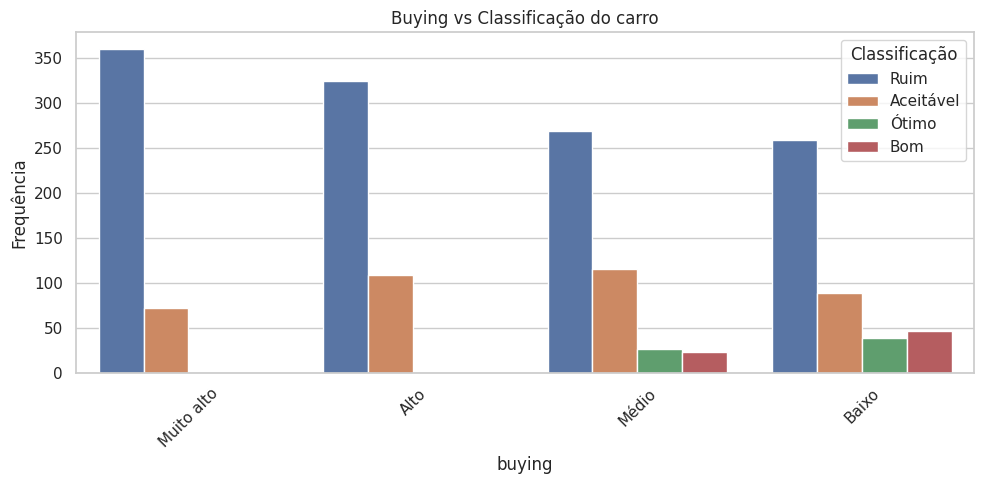

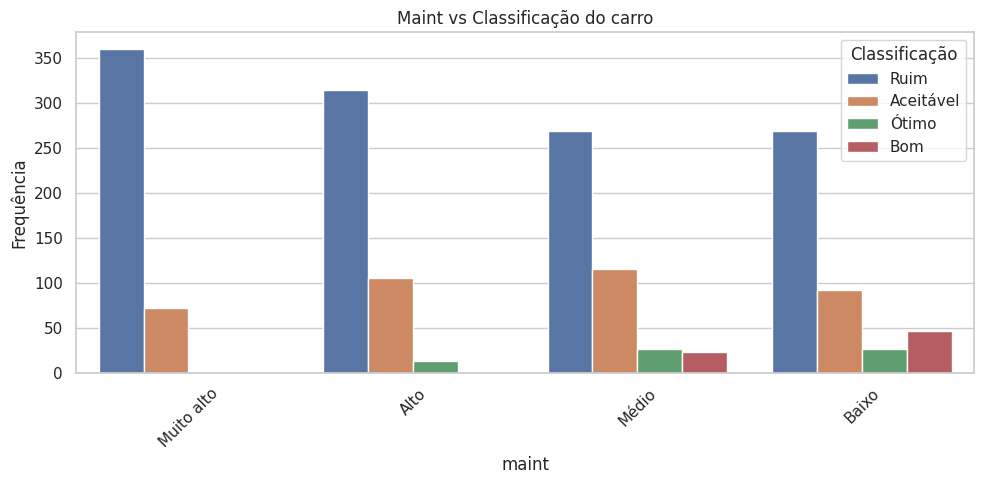

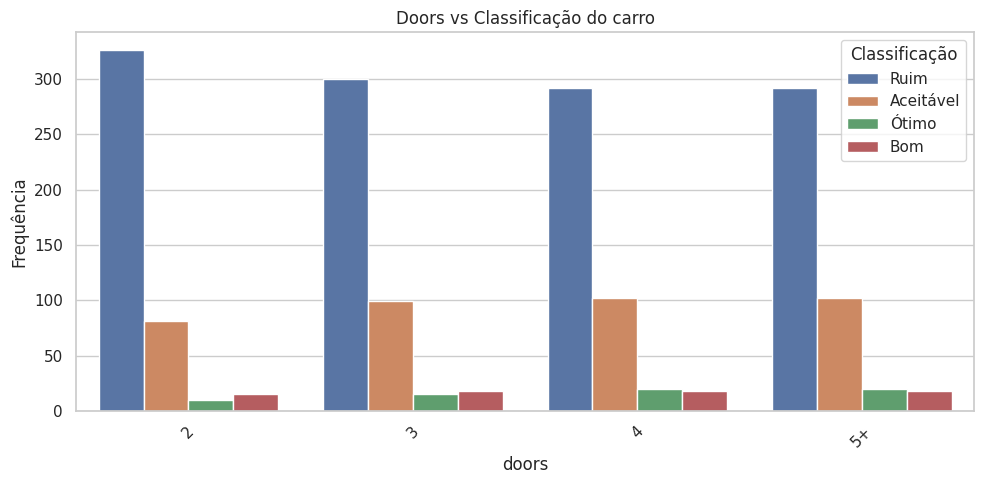

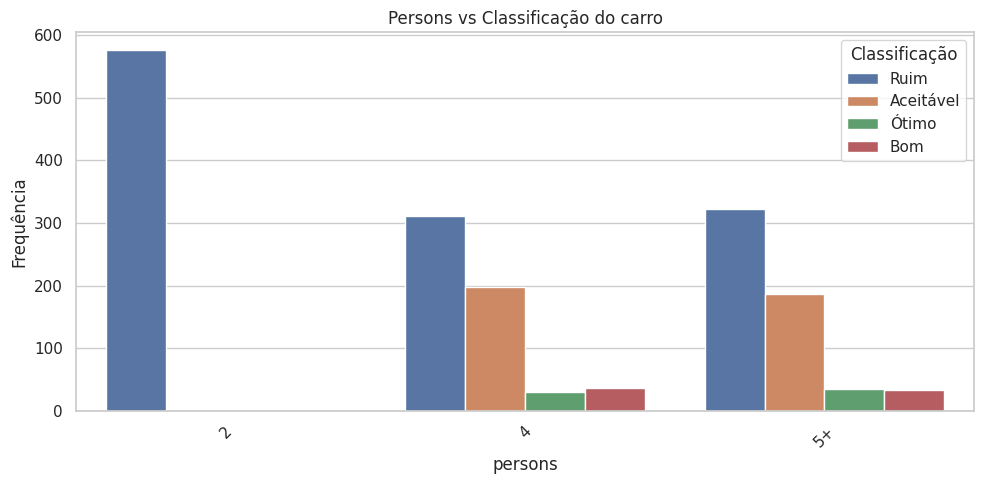

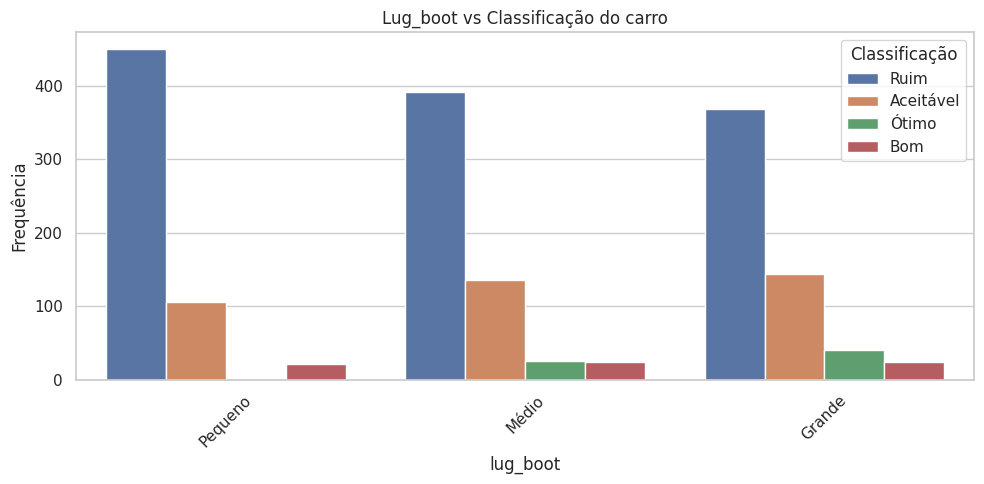

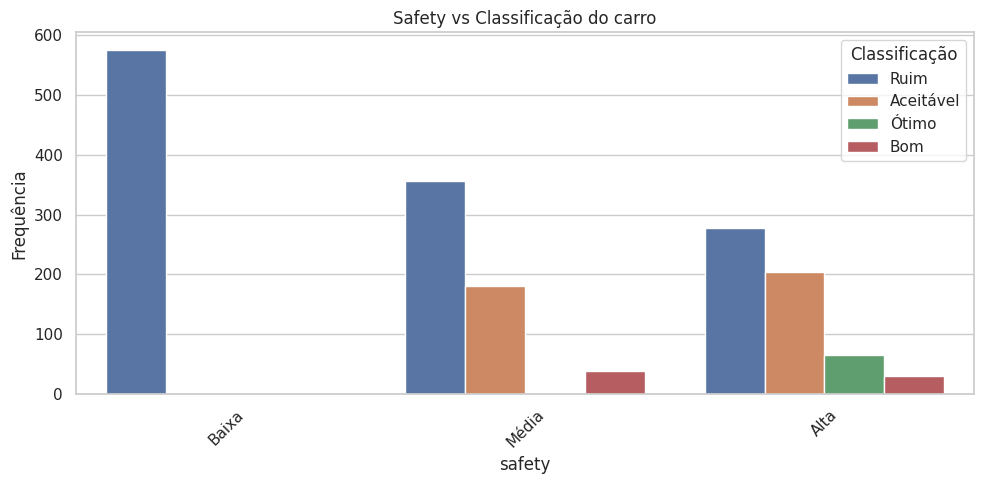

In [16]:
# Lista de atributos para cruzamento com a variável alvo
comparar_com_class = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety']

# Loop para gerar os gráficos
for col in comparar_com_class:
    plt.figure(figsize=(10, 5))
    sns.countplot(data=df_copy, x=col, hue='class', order=df_copy[col].value_counts().index)
    plt.title(f'{col.capitalize()} vs Classificação do carro')
    plt.xlabel(col)
    plt.ylabel('Frequência')
    plt.xticks(rotation=45)
    plt.legend(title='Classificação')
    plt.tight_layout()
    plt.show()


### 7. Pré-processamento dos dados

Agora que já exploramos visualmente os dados, é hora de prepará-los para uma futura modelagem. O pré-processamento garante que os dados estejam em um formato adequado para algoritmos de machine learning.

As principais ações realizadas nesta etapa são:

- **Codificação (encoding)** de variáveis categóricas em valores numéricos.
- **Verificação de valores faltantes** (novamente).
- **Padronização de tipos**.
- **Normalização e transformação dos dados**, caso necessário.
- **Criação de dataset pronto para modelagem**.

Utilizaremos a função `LabelEncoder` da biblioteca `sklearn` para converter


In [17]:
from sklearn.preprocessing import LabelEncoder

# Criando um novo DataFrame para o dataset processado
df_processed = df_copy.copy()

# Instanciando o codificador
encoder = LabelEncoder()

# Aplicando o LabelEncoder em todas as colunas (todas são categóricas)
for col in df_processed.columns:
    df_processed[col] = encoder.fit_transform(df_processed[col])

# Verificando os dados processados
df_processed.head()


,buying,maint,doors,persons,lug_boot,safety,class
0,2,2,0,0,2,1,2
1,2,2,0,0,2,2,2
2,2,2,0,0,2,0,2
3,2,2,0,0,1,1,2
4,2,2,0,0,1,2,2


### 8. Divisão dos dados em treino e teste

Com os dados já codificados numericamente, vamos separá-los em conjuntos de treino e teste. Essa divisão é essencial para avaliar o desempenho de modelos futuros de machine learning.

Utilizaremos a função `train_test_split` da biblioteca `sklearn.model_selection`, com 80% dos dados para treino e 20% para teste.


In [18]:
from sklearn.model_selection import train_test_split

# Separando variáveis independentes (X) e alvo (y)
X = df_processed.drop('class', axis=1)
y = df_processed['class']

# Dividindo entre treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Exibindo os shapes dos conjuntos
print("Treinamento:", X_train.shape, y_train.shape)
print("Teste:", X_test.shape, y_test.shape)


Treinamento: (1382, 6) (1382,)
Teste: (346, 6) (346,)


### 9. Normalização dos dados

Embora os dados estejam codificados, algoritmos baseados em distância (como KNN, SVM e redes neurais) se beneficiam de dados normalizados.

Vamos aplicar o `MinMaxScaler` da biblioteca `sklearn.preprocessing` para transformar todos os valores em uma faixa entre 0 e 1.


In [20]:
from sklearn.preprocessing import MinMaxScaler

# Instanciando o normalizador
scaler = MinMaxScaler()

# Aplicando apenas nos dados de entrada (X)
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


### 10. Exportação dos dados tratados (opcional)

Se desejar reutilizar o dataset pré-processado em outro projeto ou notebook, você pode salvá-lo como arquivo `.csv`.

Aqui salvamos os dados normalizados de treino e teste localmente no ambiente do notebook.


In [21]:
import pandas as pd

# Convertendo arrays para DataFrame para salvar como CSV
X_train_df = pd.DataFrame(X_train_scaled, columns=X.columns)
X_test_df = pd.DataFrame(X_test_scaled, columns=X.columns)

# Salvando os arquivos
X_train_df.to_csv("X_train.csv", index=False)
X_test_df.to_csv("X_test.csv", index=False)
y_train.to_csv("y_train.csv", index=False)
y_test.to_csv("y_test.csv", index=False)

print("Arquivos CSV exportados com sucesso!")


Arquivos CSV exportados com sucesso!


### ✅ Conclusão

Neste notebook, realizamos todas as etapas necessárias para preparação de um dataset para ciência de dados, conforme as boas práticas aprendidas no curso:

- Escolha e importação de um dataset real
- Análise exploratória com visualizações
- Normalização textual dos atributos
- Pré-processamento com encoding e escalonamento
- Separação de dados em treino e teste

O dataset está pronto para ser utilizado em modelos de aprendizado supervisionado, como árvores de decisão, regressão logística, random forests, etc.

Esse processo mostra a importância de conhecer e preparar bem os dados antes de aplicar algoritmos, garantindo resultados mais precisos e confiáveis.

🚀 **Próximos passos sugeridos:** modelar o problema como classificação e comparar algoritmos de machine learning.


### ✅ Checklist do Projeto

### 🔹 Definição do Problema

- **Descrição do problema:**  
  O objetivo é analisar e preparar um conjunto de dados sobre avaliação de carros, onde diferentes características dos veículos são utilizadas para determinar sua classificação final, como "unacc", "acc", "good" e "vgood".

- **É um problema supervisionado ou não supervisionado?**  
  Supervisionado — estamos lidando com uma variável-alvo categórica (`class`) e dados rotulados.

- **Hipóteses/Premissas:**  
  - A classificação do carro está diretamente relacionada a atributos como segurança, capacidade de transporte e custo de manutenção.
  - A variável `safety` provavelmente tem forte influência sobre a classificação.
  - Alguns atributos podem estar codificados de forma ordinal, como `doors` ou `persons`.

- **Restrições e condições na seleção dos dados:**  
  - Foi utilizado um dataset público do repositório UCI, com dados completos e sem valores nulos.
  - Nenhum atributo foi excluído ou modificado na importação.

- **Definição dos atributos do dataset:**  
  - `buying`: custo de compra do veículo (vhigh, high, med, low)  
  - `maint`: custo de manutenção (vhigh, high, med, low)  
  - `doors`: número de portas (2, 3, 4, 5more)  
  - `persons`: capacidade de transporte (2, 4, more)  
  - `lug_boot`: tamanho do porta-malas (small, med, big)  
  - `safety`: nível de segurança (low, med, high)  
  - `class`: classificação geral do carro (unacc, acc, good, vgood)

---

### 🔹 Análise de Dados

- **Número de instâncias e atributos:**  
  - 1.728 instâncias (linhas)  
  - 7 atributos (6 preditores + 1 alvo)

- **Tipos de dados dos atributos:**  
  Todos são categóricos, tratados como `object` no pandas.

- **Primeiras linhas do dataset:**  
  Verificou-se que os dados estão bem organizados, sem ruídos ou erros visíveis.

- **Valores faltantes ou discrepantes:**  
  Não foram encontrados valores nulos nem registros inconsistentes.

- **Estatísticas descritivas:**  
  Por serem variáveis categóricas, a estatística foi feita por meio de contagens de frequência e visualizações de distribuição (gráficos de barras).  
  **Exemplo:** A maioria dos veículos possui `safety = low`, e há uma predominância da classe `unacc`.

- **Distribuição dos atributos:**  
  As visualizações indicaram desequilíbrio em algumas categorias, especialmente na variável `class`, com predominância de classificações negativas.

- **Insights combinados:**  
  - Veículos com `safety = high` são os mais propensos a serem classificados como "vgood".
  - A quantidade de `persons` transportados também influencia positivamente a classificação.

---

### 🔹 Pré-processamento dos dados

- **Tratamentos realizados:**  
  - Codificação de todas as variáveis categóricas com `LabelEncoder`.
  - Divisão do dataset em treino (80%) e teste (20%).
  - Normalização com `MinMaxScaler`.

- **Justificativa:**  
  A codificação foi necessária para permitir o uso futuro de algoritmos supervisionados. A normalização padronizou a escala dos dados, melhorando a performance de modelos baseados em distância.

- **Observação:**  
  Nenhuma transformação complexa foi exigida, já que os dados estavam limpos e consistentes.

---



In [23]:
# Exibindo resumo estatístico dos dados já codificados numericamente
# Aqui conseguimos visualizar: média, mediana (não diretamente), mínimo, máximo, desvio padrão, etc.

print("Resumo estatístico dos atributos codificados:\n")
resumo = df_processed.describe()
display(resumo)


Resumo estatístico dos atributos codificados:



,buying,maint,doors,persons,lug_boot,safety,class
count,1728.000000,1728.000000,1728.000000,1728.000000,1728.000000,1728.000000,1728.000000
mean,1.500000,1.500000,1.500000,1.000000,1.000000,1.000000,1.553241
std,1.118358,1.118358,1.118358,0.816733,0.816733,0.816733,0.875948
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.750000,0.750000,0.750000,0.000000,0.000000,0.000000,1.000000
50%,1.500000,1.500000,1.500000,1.000000,1.000000,1.000000,2.000000
75%,2.250000,2.250000,2.250000,2.000000,2.000000,2.000000,2.000000
max,3.000000,3.000000,3.000000,2.000000,2.000000,2.000000,3.000000


### 📊 Análise estatística dos atributos numéricos

Após aplicar o `LabelEncoder`, os dados categóricos foram transformados em números inteiros. A tabela acima apresenta estatísticas descritivas para cada atributo:

- **count:** Todos os atributos possuem 1.728 registros (sem valores ausentes).
- **mean (média):** Representa a média dos valores codificados para cada atributo. Apesar de não ter significado semântico direto (pois os dados eram categóricos), pode indicar distribuição.
- **std (desvio padrão):** Mostra a dispersão dos valores em relação à média. Quanto maior, mais variado o atributo.
- **min / max:** Representam os menores e maiores valores codificados. Por exemplo, `safety` varia de 0 a 2.
- **25%, 50%, 75%:** Representam os quartis. A mediana está representada pelo valor de 50%.

📌 **Conclusões principais:**
- Não há valores faltantes.
- Os dados estão numericamente distribuídos conforme o número de categorias em cada atributo.
- A maior variação ocorre nos atributos `class` e `safety`, sugerindo maior diversidade de classificações.

